# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
import re

## 1. Gather data

### **1.1.** Problem Statement
I will be looking at raw data from 2 different sources of video games sold through the Steam gaming app. I would like to know which of the best reviewed games have dropped in price the most from their initial release price to the current price of when the dataset was pulled.  

I plan to use the Kaggle API to acquire the 'steam_app_data.csv' dataset from Kaggle and to manually download the 'Steam Trends 2023' dataset from Google Sheets.

#### **Dataset 1 - Steam Video Game Data Set**

Type: .csv file

Method: The data was gathered from www.kaggle.com using the Kaggle API

Dataset variables:

*   'name'
*   'steam_appid'
*   'price_overview'
*   'platforms'
*   'metacritic'
*   'release_date'

In [2]:
# Gather the first dataset from Kaggle via API

!kaggle datasets download -d nikdavis/steam-store-raw -p ./data --unzip

df_steam = pd.read_csv('./data/steam_app_data.csv')

df_steam.head()

Dataset URL: https://www.kaggle.com/datasets/nikdavis/steam-store-raw
License(s): unknown




  0%|          | 0.00/53.4M [00:00<?, ?B/s]
100%|██████████| 53.4M/53.4M [00:00<00:00, 1.44GB/s]


,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 931},{'total': 0},"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/40/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 4355},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,"{'ids': [], 'notes': None}"


#### Dataset 2 - Steam Trends 2023

Type: .csv file

Method: Manually gathered from Google Sheets "Steam Trends 2023 by @evlko and @Sadari
https://docs.google.com/spreadsheets/d/1D5MErWbFJ2Gsde9QxJ_HNMltKfF6fHCYdv4OQpXdnZ4/edit?gid=1714749788#gid=1714749788

Dataset variables:

*   'App ID'
*   'Title'
*   'Reviews Total'
*   'Reviews Score'
*   'Release Date'
*   'Launch Price'

In [3]:
# Assign my downloaded file to 'df_sheets'

df_sheets = pd.read_csv('./data/Steam Trends 2023.csv')
df_sheets.head()

,App ID,Title,Reviews Total,Reviews Score Fancy,Release Date,Reviews D7,Reviews D30,Reviews D90,Launch Price,Tags,name_slug,Revenue Estimated,Modified Tags,Steam Page
0,730,Counter-Strike: Global Offensive,7382695,88%,2012-08-21,NaN,NaN,NaN,"$14,99","FPS, Shooter, Multiplayer, Competitive, Action...",NaN,"$110 666 598,05","FPS_, Shooter_, Multiplayer_, Competitive_, Ac...",https://store.steampowered.com/app/730
1,578080,PUBG: BATTLEGROUNDS,2201296,57%,2017-12-21,NaN,NaN,NaN,"$29,99","Survival, Shooter, Battle Royale, Multiplayer,...",NaN,"$66 016 867,04","Survival_, Shooter_, Battle Royale_, Multiplay...",https://store.steampowered.com/app/578080
2,570,Dota 2,2017009,82%,2013-07-09,NaN,NaN,NaN,"$29,99","Free to Play, MOBA, Multiplayer, Strategy, eSp...",NaN,"$60 490 099,91","Free to Play_, MOBA_, Multiplayer_, Strategy_,...",https://store.steampowered.com/app/570
3,271590,Grand Theft Auto V,1322782,"89,85%",2015-04-13,NaN,NaN,NaN,"$29,99","Open World, Action, Multiplayer, Crime, Automo...",NaN,"$39 670 232,18","Open World_, Action_, Multiplayer_, Crime_, Au...",https://store.steampowered.com/app/271590
4,359550,Tom Clancy's Rainbow Six® Siege,978762,86%,2015-12-01,NaN,NaN,NaN,"$59,99","FPS, PvP, eSports, Shooter, Multiplayer, Tacti...",NaN,"$58 715 932,38","FPS_, PvP_, eSports_, Shooter_, Multiplayer_, ...",https://store.steampowered.com/app/359550


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing values in critical variables

In [4]:
#FILL IN - Inspecting the dataframe visually for any missing values

df_steam.head(5)

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 931},{'total': 0},"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/40/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 4355},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,"{'ids': [], 'notes': None}"


When pulling the first 5 rows for 'df_steam', there is hardly anything wrong in terms of quality. Let's look at a few random samples to see if there is anything else missing.

In [5]:
# take a random sampling of 'df_steam'

# df_steam.sample(5)

# because .sample() is a random assignment, I can't repeat what I found when I ran it the first time. 
# I found index value 3037 had a value of {'coming_soon': True, 'date': ''} for the 'release_date' column
# 'date': '' is missing for that value. Here is a print out of that line only
print(df_steam[df_steam.index == 3037])

      type       name  steam_appid  required_age is_free controller_support  \
3037  game  Dollhouse       280850          18.0   False               full   

      dlc                               detailed_description  \
3037  NaN  <h2 class="bb_tag">About Dollhouse</h2>This ha...   

                                         about_the_game  \
3037  <h2 class="bb_tag">About Dollhouse</h2>This ha...   

                                      short_description  ...  \
3037  Dollhouse is a frightening film noir horror st...  ...   

                                             categories  \
3037  [{'id': 2, 'description': 'Single-player'}, {'...   

                                                 genres  \
3037  [{'id': '1', 'description': 'Action'}, {'id': ...   

                                            screenshots  \
3037  [{'id': 0, 'path_thumbnail': 'https://steamcdn...   

                                                 movies recommendations  \
3037  [{'id': 256748227, 'name':

Here we see a missing values for 'release_date' for the game 'Dollhouse' index[3037]. There is also a tidyness issue we need to address. I'll need to search for any games that do not have a release date and drop those specific rows.

In [6]:
# Let's look for null values programmatically

# Check for quantity of NaN values for 'df_asteroid.diameter'
print('There are {} NaN values in the dataset df_steam.release_date.'.format(df_steam.release_date.isnull().sum()))

There are 149 NaN values in the dataset df_steam.release_date.


### Quality Issue 2: Columns with dollar values need to be formatted correctly

In [7]:
# Inspected the money columns in df_sheets visually

df_sheets.head()

,App ID,Title,Reviews Total,Reviews Score Fancy,Release Date,Reviews D7,Reviews D30,Reviews D90,Launch Price,Tags,name_slug,Revenue Estimated,Modified Tags,Steam Page
0,730,Counter-Strike: Global Offensive,7382695,88%,2012-08-21,NaN,NaN,NaN,"$14,99","FPS, Shooter, Multiplayer, Competitive, Action...",NaN,"$110 666 598,05","FPS_, Shooter_, Multiplayer_, Competitive_, Ac...",https://store.steampowered.com/app/730
1,578080,PUBG: BATTLEGROUNDS,2201296,57%,2017-12-21,NaN,NaN,NaN,"$29,99","Survival, Shooter, Battle Royale, Multiplayer,...",NaN,"$66 016 867,04","Survival_, Shooter_, Battle Royale_, Multiplay...",https://store.steampowered.com/app/578080
2,570,Dota 2,2017009,82%,2013-07-09,NaN,NaN,NaN,"$29,99","Free to Play, MOBA, Multiplayer, Strategy, eSp...",NaN,"$60 490 099,91","Free to Play_, MOBA_, Multiplayer_, Strategy_,...",https://store.steampowered.com/app/570
3,271590,Grand Theft Auto V,1322782,"89,85%",2015-04-13,NaN,NaN,NaN,"$29,99","Open World, Action, Multiplayer, Crime, Automo...",NaN,"$39 670 232,18","Open World_, Action_, Multiplayer_, Crime_, Au...",https://store.steampowered.com/app/271590
4,359550,Tom Clancy's Rainbow Six® Siege,978762,86%,2015-12-01,NaN,NaN,NaN,"$59,99","FPS, PvP, eSports, Shooter, Multiplayer, Tacti...",NaN,"$58 715 932,38","FPS_, PvP_, eSports_, Shooter_, Multiplayer_, ...",https://store.steampowered.com/app/359550


'Launch Price" and "Revenue Estimated' have '$', ',' and ' ' in the formatting of the values. Need to correct

In [8]:
#FILL IN - Inspecting the dataframe programmatically

df_sheets.info()
df_sheets['Launch Price'].sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65111 entries, 0 to 65110
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App ID               65111 non-null  int64  
 1   Title                65111 non-null  object 
 2   Reviews Total        65111 non-null  int64  
 3   Reviews Score Fancy  65111 non-null  object 
 4   Release Date         65111 non-null  object 
 5   Reviews D7           0 non-null      float64
 6   Reviews D30          0 non-null      float64
 7   Reviews D90          0 non-null      float64
 8   Launch Price         65111 non-null  object 
 9   Tags                 65111 non-null  object 
 10  name_slug            0 non-null      float64
 11  Revenue Estimated    65111 non-null  object 
 12  Modified Tags        65111 non-null  object 
 13  Steam Page           65111 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 7.0+ MB


8114          $0,50
30220         $0,90
27790         $0,90
34341         $0,90
19979         $0,90
            ...    
29565        $99,99
29564        $99,99
4195         $99,99
40116       $999,00
31643    $99 999,99
Name: Launch Price, Length: 65111, dtype: object

'Launch Price' and 'Revenue Estimated' show to be object data types. Also pulling sort_values() shows the '$' and ',' symbols.

The missing values and incorrect formatting need to be corrected so that we can sort and analyze the data to get the accurate results that we need.

### Tidiness Issue 1: In the dataset 'df_steam' column 'release_date' has dictionary values

In [9]:
#FILL IN - Inspecting the dataframe visually

df_steam.release_date.head(1)

0    {'coming_soon': False, 'date': '1 Nov, 2000'}
Name: release_date, dtype: object

In [10]:
#FILL IN - Inspecting the dataframe programmatically

df_steam.release_date.info()
df_steam.release_date.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 29235 entries, 0 to 29234
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
29086 non-null  object
dtypes: object(1)
memory usage: 228.5+ KB


count                                              29086
unique                                              2840
top       {'coming_soon': False, 'date': '13 Jul, 2018'}
freq                                                  65
Name: release_date, dtype: object

The value for column 'release_date' for index 1 is '{'coming_soon': False, 'date': '1 Nov, 2000'}' This is a dictionary that has 2 variables in the column, 'coming_soon' and 'date'. These will need to be split up so that we can utilize the actual date of release.

### Tidiness Issue 2: When merging the two datasets, it will create duplicate video game titles in the merged dataset. 

I'll inspect both data frames visually and programmatically to determine the best course of action to merge the 2 data frames.

In [11]:
#FILL IN - Inspecting the dataframe visually

df_steam.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 931},{'total': 0},"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/40/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 4355},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,"{'ids': [], 'notes': None}"


In [12]:
df_sheets.head()

,App ID,Title,Reviews Total,Reviews Score Fancy,Release Date,Reviews D7,Reviews D30,Reviews D90,Launch Price,Tags,name_slug,Revenue Estimated,Modified Tags,Steam Page
0,730,Counter-Strike: Global Offensive,7382695,88%,2012-08-21,NaN,NaN,NaN,"$14,99","FPS, Shooter, Multiplayer, Competitive, Action...",NaN,"$110 666 598,05","FPS_, Shooter_, Multiplayer_, Competitive_, Ac...",https://store.steampowered.com/app/730
1,578080,PUBG: BATTLEGROUNDS,2201296,57%,2017-12-21,NaN,NaN,NaN,"$29,99","Survival, Shooter, Battle Royale, Multiplayer,...",NaN,"$66 016 867,04","Survival_, Shooter_, Battle Royale_, Multiplay...",https://store.steampowered.com/app/578080
2,570,Dota 2,2017009,82%,2013-07-09,NaN,NaN,NaN,"$29,99","Free to Play, MOBA, Multiplayer, Strategy, eSp...",NaN,"$60 490 099,91","Free to Play_, MOBA_, Multiplayer_, Strategy_,...",https://store.steampowered.com/app/570
3,271590,Grand Theft Auto V,1322782,"89,85%",2015-04-13,NaN,NaN,NaN,"$29,99","Open World, Action, Multiplayer, Crime, Automo...",NaN,"$39 670 232,18","Open World_, Action_, Multiplayer_, Crime_, Au...",https://store.steampowered.com/app/271590
4,359550,Tom Clancy's Rainbow Six® Siege,978762,86%,2015-12-01,NaN,NaN,NaN,"$59,99","FPS, PvP, eSports, Shooter, Multiplayer, Tacti...",NaN,"$58 715 932,38","FPS_, PvP_, eSports_, Shooter_, Multiplayer_, ...",https://store.steampowered.com/app/359550


When I join the datasets, I'll need to use 'steam_appid' from df_steam and 'App Id' from df_sheets and my matching keys. 

In [13]:
#FILL IN - Inspecting the dataframe programmatically

# Confirm that there are values of 'steam_appid' that match with values in 'App ID'
steam_appid_found = df_steam['steam_appid'].isin(df_sheets['App ID']).sum()
print('All items from "steam_appID" in "App ID": {}'.format(steam_appid_found))

app_ID_found = df_sheets['App ID'].isin(df_steam['steam_appid']).sum()
print('All items from "App ID" in "steam_appID": {}'.format(app_ID_found))

All items from "steam_appID" in "App ID": 24287
All items from "App ID" in "steam_appID": 24281


I've confirmed that there are matching values in each dataset to merge together.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [14]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted

df_steam_clean = df_steam.copy()
df_sheets_clean = df_sheets.copy()

### **Tidiness Issue 1: In the dataset 'df_steam' column 'release_date' has dictionary values**

Before I can do cleaning, I need to tidy up column 'release_date' from df_steam_clean so that I can address the quality.

In [15]:
# FILL IN - Apply the tidying strategy

# splits 'release_date' column into 'coming_soon' and 'rel_date'
df_steam_clean[['coming_soon','rel_date']] = df_steam_clean['release_date'].str.split(', ', n=1, expand=True)

# drop original 'release_date' col
df_steam_clean = df_steam_clean.drop(columns='release_date')

# clean up 'rel_date' values to just the date info
df_steam_clean['rel_date'] = df_steam_clean['rel_date'].str[9:]
df_steam_clean['rel_date'] = df_steam_clean['rel_date'].str.replace(",|'|}", "", regex=True)
df_steam_clean['rel_date'] = df_steam_clean['rel_date'].str.replace(" ", "-", regex=True)

# convert 'rel_date' col to datetime datatype
df_steam_clean['rel_date'] = pd.to_datetime(df_steam_clean['rel_date'], errors='coerce')

In [16]:
# confirm the new column 'rel_date' is a datetime datatype

df_steam_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   type                     29086 non-null  object        
 1   name                     29234 non-null  object        
 2   steam_appid              29235 non-null  int64         
 3   required_age             29086 non-null  float64       
 4   is_free                  29086 non-null  object        
 5   controller_support       5998 non-null   object        
 6   dlc                      4975 non-null   object        
 7   detailed_description     29060 non-null  object        
 8   about_the_game           29060 non-null  object        
 9   short_description        29060 non-null  object        
 10  fullgame                 0 non-null      float64       
 11  supported_languages      29072 non-null  object        
 12  header_image             29086 n

Justification: I needed to get the release date into a format that I can now use. 

### **Quality Issue 1: Missing values in critical variables**

In [17]:
#FILL IN - Apply the cleaning strategy for NaN values in the new col 'rel_date'

df_steam_clean['rel_date'].isnull().sum()
df_steam_clean = df_steam_clean.dropna(subset='rel_date')

In [18]:
#FILL IN - Validate the cleaning was successful
df_steam_clean.info()

print('There are {} null values in column "rel_date".'.format(df_steam_clean.rel_date.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
Index: 28703 entries, 0 to 29234
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   type                     28703 non-null  object        
 1   name                     28702 non-null  object        
 2   steam_appid              28703 non-null  int64         
 3   required_age             28703 non-null  float64       
 4   is_free                  28703 non-null  object        
 5   controller_support       5877 non-null   object        
 6   dlc                      4952 non-null   object        
 7   detailed_description     28685 non-null  object        
 8   about_the_game           28685 non-null  object        
 9   short_description        28685 non-null  object        
 10  fullgame                 0 non-null      float64       
 11  supported_languages      28697 non-null  object        
 12  header_image             28703 non-nu

Justification: Due to the missing 'rel_date' data, I dropped all rows that had a null value for 'rel_date'.

### **Quality Issue 2: Columns with dollar values need to be formatted correctly**

In [19]:
#FILL IN - Apply the cleaning strategy

# Fix columne name 'Revenue Estimated' to 'rev_estimated'
df_sheets_clean = df_sheets_clean.rename(columns={'Launch Price': 'launch_price'})
df_sheets_clean = df_sheets_clean.rename(columns={'Revenue Estimated': 'rev_estimated'})


# Create function to clean up punctuation

def remove_punc(df, col, rem_punc_1, rep_punc_1, rem_punc_2, rep_punc_2):
    df[col] = df[col].str.replace(rem_punc_1, rep_punc_1)
    df[col] = df[col].str.replace(rem_punc_2, rep_punc_2)

# Call function

remove_punc(df_sheets_clean, 'launch_price', ',', '.', '$', '')
remove_punc(df_sheets_clean, 'rev_estimated', ',', '.', '$', '')

# Remove additional characters from 'launch_price'
df_sheets_clean['launch_price'] = df_sheets_clean['launch_price'].str.replace('\xa0', '', regex=True) 

# Resolve spaces in the 'rev_estimated' column
df_sheets_clean['rev_estimated'] = df_sheets_clean['rev_estimated'].str.replace(r'\s+', '', regex=True) 

# Change datatype to float
pd.to_numeric(df_sheets_clean['rev_estimated'])
df_sheets_clean["rev_estimated"] = df_sheets_clean["rev_estimated"].astype(float)

pd.to_numeric(df_sheets_clean['launch_price'])
df_sheets_clean["launch_price"] = df_sheets_clean["launch_price"].astype(float)

In [20]:
#FILL IN - Validate the cleaning was successful

df_sheets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65111 entries, 0 to 65110
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App ID               65111 non-null  int64  
 1   Title                65111 non-null  object 
 2   Reviews Total        65111 non-null  int64  
 3   Reviews Score Fancy  65111 non-null  object 
 4   Release Date         65111 non-null  object 
 5   Reviews D7           0 non-null      float64
 6   Reviews D30          0 non-null      float64
 7   Reviews D90          0 non-null      float64
 8   launch_price         65111 non-null  float64
 9   Tags                 65111 non-null  object 
 10  name_slug            0 non-null      float64
 11  rev_estimated        65111 non-null  float64
 12  Modified Tags        65111 non-null  object 
 13  Steam Page           65111 non-null  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 7.0+ MB


Justification: Because I'm looking for which highly reviewed games have had the most change in cost from their launch price to their current price, I need to be able to mathematical calculations with it. I can't do that if the datatype is object

### **Remove unnecessary variables**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [21]:
#FILL IN - Remove unnecessary variables

# find list of column header names
list(df_steam_clean)

['type',
 'name',
 'steam_appid',
 'required_age',
 'is_free',
 'controller_support',
 'dlc',
 'detailed_description',
 'about_the_game',
 'short_description',
 'fullgame',
 'supported_languages',
 'header_image',
 'website',
 'pc_requirements',
 'mac_requirements',
 'linux_requirements',
 'legal_notice',
 'drm_notice',
 'ext_user_account_notice',
 'developers',
 'publishers',
 'demos',
 'price_overview',
 'packages',
 'package_groups',
 'platforms',
 'metacritic',
 'reviews',
 'categories',
 'genres',
 'screenshots',
 'movies',
 'recommendations',
 'achievements',
 'support_info',
 'background',
 'content_descriptors',
 'coming_soon',
 'rel_date']

In [22]:
# Make a list of the columns I want to keep
col_keep = ['steam_appid', 'price_overview']

# Assign a new DF the filtered columns
df_steam_filt = df_steam_clean[col_keep]

df_steam_filt.head(1)

,steam_appid,price_overview
0,10,"{'currency': 'GBP', 'initial': 719, 'final': 7..."


In [23]:
# Fix 'price_overview'

# Make a copy of the DF for this task
df_1 = df_steam_filt.copy()

# split the values in column 'price_overview' to a list
df_1['price_overview'] = df_1['price_overview'].str.split(':', expand=False)

# Create new column 'stripped' with the following condition
# isinstance(x, list) confirms this is a list
# len(x) > 0 confirms this list is not empty
# not re.search(r'[A-Za-z]', str(x[-1])) ensures the last item in the list does not contain any 
# alphabetic characters (converted to string just in case it is numeric)
# else None - if condition fails, return None
df_1['current_price'] = df_1['price_overview'].apply(
    lambda x: x[-1] if isinstance(x, list) and len(x) > 0 and not re.search(r'[A-Za-z]', str(x[-1])) else None)

#Cleaning up remain list item
df_1['current_price'] = df_1['current_price'].str[3:]
df_1['current_price'] = df_1['current_price'].str[:-2]
df_1['current_price'] = df_1['current_price'].str.replace(',|€', '', regex=True)

# convert to numeric and float
pd.to_numeric(df_1['current_price'])
df_1['current_price'] = df_1['current_price'].astype(float)

# drop 'price_overview' column
df_1.drop('price_overview', axis=1, inplace=True)

# Drop null values
df_1 = df_1.dropna()

In [24]:
# copy back to filtered DF
df_steam_filt = df_1.copy()

# rename 'steam_appid' to match other dataframe's 'id' to use as a key for the merger.
df_steam_filt = df_steam_filt.rename(columns={'steam_appid': 'app_id'})

# Confirm changes worked
df_steam_filt.info()
df_steam_filt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25420 entries, 0 to 29234
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         25420 non-null  int64  
 1   current_price  25420 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 595.8 KB


,app_id,current_price
0,10,7.19
1,20,3.99
2,30,3.99
3,40,3.99
4,50,3.99


In [25]:
#FILL IN - Remove unnecessary variables

# find list of column header names
list(df_sheets_clean)

['App ID',
 'Title',
 'Reviews Total',
 'Reviews Score Fancy',
 'Release Date',
 'Reviews D7',
 'Reviews D30',
 'Reviews D90',
 'launch_price',
 'Tags',
 'name_slug',
 'rev_estimated',
 'Modified Tags',
 'Steam Page']

In [26]:
# Make a list of the columns I want to keep
col_keep = ['App ID', 'Title', 'Reviews Total', 'Reviews Score Fancy', 'Release Date', 'launch_price']

# Assign a new DF the filtered columns
df_sheets_filt = df_sheets_clean[col_keep]

# Rename columns
df_sheets_filt.rename(columns={'App ID': 'app_id',
                               'Title': 'title', 
                               'Reviews Total': 'reviews_total', 
                               'Reviews Score Fancy': 'review_score', 
                               'Release Date': 'release_date'
                               }, inplace=True)

# Confirm changes
df_sheets_filt.info()
df_sheets_filt.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65111 entries, 0 to 65110
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         65111 non-null  int64  
 1   title          65111 non-null  object 
 2   reviews_total  65111 non-null  int64  
 3   review_score   65111 non-null  object 
 4   release_date   65111 non-null  object 
 5   launch_price   65111 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


C:\Users\joshm\AppData\Local\Temp\ipykernel_7684\2783930241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sheets_filt.rename(columns={'App ID': 'app_id',


,app_id,title,reviews_total,review_score,release_date,launch_price
0,730,Counter-Strike: Global Offensive,7382695,88%,2012-08-21,14.99


In [27]:
# remove % sign, convert to decimal and convert 'review_score' to float

df_sheets_filt['review_score'] = df_sheets_filt['review_score'].str.replace(",", ".", regex=True)


def convert_to_decimal(value):
  if isinstance(value, str) and '%' in value:
    return float(value.strip('%')) / 100
  else:
     pass
  return float(value)

# for every column, apply the 'convert_to_decimal' function
df_sheets_filt['review_score'] = df_sheets_filt['review_score'].apply(convert_to_decimal)


#df_sheets_filt['review_score'] = df_sheets_filt["review_score"].astype(float)

df_sheets_filt.head()

C:\Users\joshm\AppData\Local\Temp\ipykernel_7684\1867399235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sheets_filt['review_score'] = df_sheets_filt['review_score'].str.replace(",", ".", regex=True)
C:\Users\joshm\AppData\Local\Temp\ipykernel_7684\1867399235.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sheets_filt['review_score'] = df_sheets_filt['review_score'].apply(convert_to_decimal)


,app_id,title,reviews_total,review_score,release_date,launch_price
0,730,Counter-Strike: Global Offensive,7382695,0.8800,2012-08-21,14.99
1,578080,PUBG: BATTLEGROUNDS,2201296,0.5700,2017-12-21,29.99
2,570,Dota 2,2017009,0.8200,2013-07-09,29.99
3,271590,Grand Theft Auto V,1322782,0.8985,2015-04-13,29.99
4,359550,Tom Clancy's Rainbow Six® Siege,978762,0.8600,2015-12-01,59.99


### **Tidiness Issue 2: When merging the two datasets, it will create duplicate video game titles in the merged dataset.**

In [28]:
# Now I have both datesets clean and removed of null values, let's merge them together based on the 'app_id' key.
 
combined_df = pd.merge(df_steam_filt, df_sheets_filt, on='app_id', how='outer') 

In [29]:
# .dropna for final differences between the two datasets
combined_df = combined_df.dropna()

# confirm everything
combined_df.head()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23482 entries, 0 to 30889
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         23482 non-null  int64  
 1   current_price  23482 non-null  float64
 2   title          23482 non-null  object 
 3   reviews_total  23482 non-null  float64
 4   review_score   23482 non-null  float64
 5   release_date   23482 non-null  object 
 6   launch_price   23482 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.4+ MB


Justification: I used the .merge() function based on the 'app_id' key so that all values will merge togeher on the same observational unit. If I had used .append(), I would have duplicates of the same video games. 

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [30]:
#FILL IN - saving data

df_steam_filt.to_csv('./clean/steam_data_filtered.csv')
df_sheets_filt.to_csv('./clean/sheets_data_filtered.csv')
combined_df.to_csv('./clean/combined_data.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Which of the best reviewed games have dropped in price the most from their initial release price to the current price of when the dataset was pulled.  

In [31]:
# create a new df for the top 20 reviewed games

top_20 = combined_df.copy()
top_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23482 entries, 0 to 30889
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         23482 non-null  int64  
 1   current_price  23482 non-null  float64
 2   title          23482 non-null  object 
 3   reviews_total  23482 non-null  float64
 4   review_score   23482 non-null  float64
 5   release_date   23482 non-null  object 
 6   launch_price   23482 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.4+ MB


In [32]:
# Filter the 'combined_df' game list by a minimum of 5000 reviews and sort in order of highest score to smallest score

top_20 = combined_df[combined_df['reviews_total'] >= 5000].sort_values(by='review_score', ascending=False)
top_20 = top_20.head(20)
top_20

,app_id,current_price,title,reviews_total,review_score,release_date,launch_price
16030,667970,22.99,VTOL VR,11504.0,0.98,2017-08-03,29.99
18680,736260,11.39,Baba Is You,15534.0,0.98,2019-03-13,14.99
2529,264200,3.99,One Finger Death Punch,12341.0,0.98,2014-03-03,4.99
16,400,7.19,Portal,115384.0,0.98,2007-10-10,9.99
10436,508440,11.39,Totally Accurate Battle Simulator,102100.0,0.98,2021-04-01,19.99
9005,460950,11.39,Katana ZERO,52203.0,0.98,2019-04-18,14.99
7650,420530,6.99,OneShot,34478.0,0.98,2016-12-01,9.99
7423,413150,10.99,Stardew Valley,495433.0,0.98,2016-02-26,14.99
3287,294100,27.79,RimWorld,138460.0,0.98,2018-10-17,34.99
4591,337340,6.99,Finding Paradise,13708.0,0.98,2017-12-14,9.99


In [33]:
# Find the difference in price from launch to current and add new column

top_20['price_change'] = ((top_20['launch_price'] - top_20['current_price']) / top_20['launch_price']) * 100
top_20.head(1)

,app_id,current_price,title,reviews_total,review_score,release_date,launch_price,price_change
16030,667970,22.99,VTOL VR,11504.0,0.98,2017-08-03,29.99,23.341114


In [34]:
# Graphing label function

def labels(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

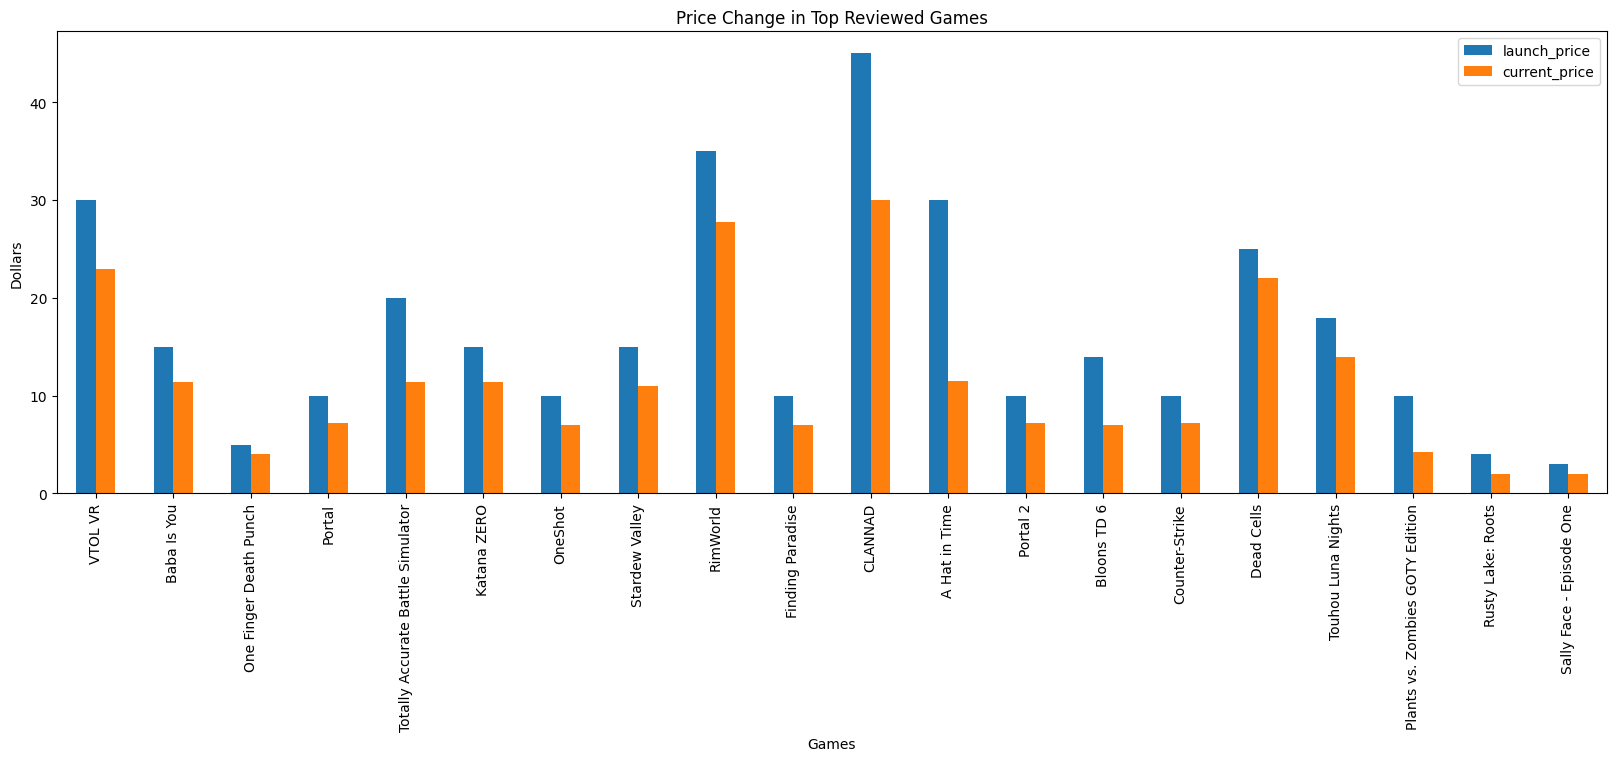

In [35]:
# Graph showing the launch price and current price of the top 20 games 

top_20.plot(x='title', y=['launch_price', 'current_price'], kind='bar', figsize=(20,6));
labels('Price Change in Top Reviewed Games', 'Games', 'Dollars')

*Answer to research question:* This graph shows the top 20 best reviewed video games per the datasets that I wrangled. I'm directly comparing the cost of each video game when it was first released at the game's launch and the games current cost, at the time of the data set. You can see that some of these video games, like "One Finger Death Punch" and "Sally Face - Episode One" were fairly affordable at launch, while other games were more expensive, like "CLANNAD" and "RimWorld".

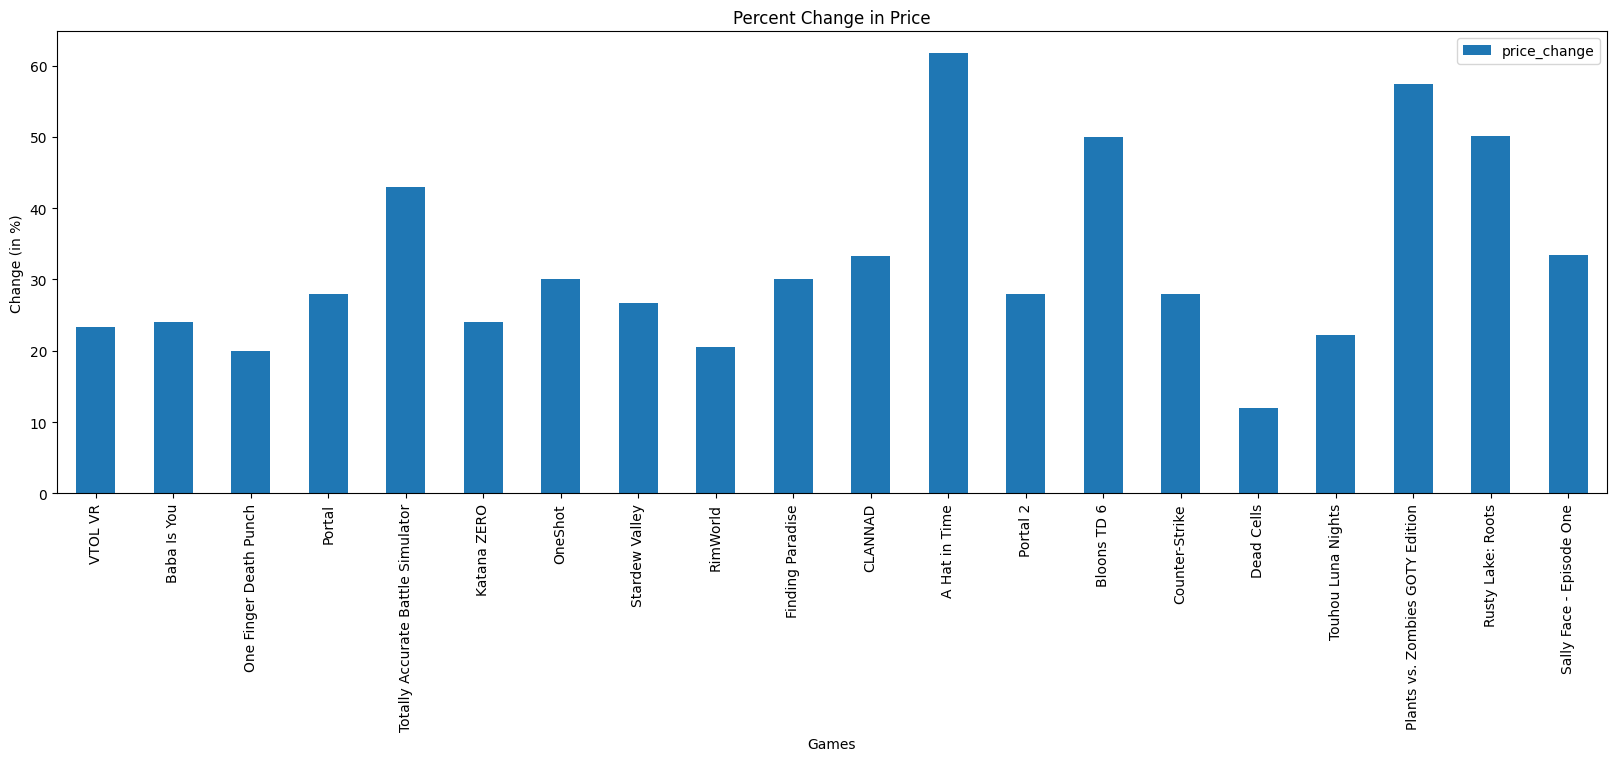

In [36]:
# graph showing the percent change in pricing difference between the launch price and current price.

top_20.plot(x='title', y=['price_change'], kind='bar', figsize=(20,6));
labels('Percent Change in Price', 'Games', 'Change (in %)')

*Answer to research question:* After gathering, assessing and cleaning the two data sets on video games, I was able to determine the answer to my original question, which of the best reviewed games have dropped in price the most from their initial release price to the current price of when the dataset was pulled. The game "A Hat in Time" had the largest change in price, by percentage, from when it first came out to when the most recent dataset was pulled at over 60% chage. Using this information, I'll be able to decided which of the most highly reviewed games are currently on the best discount compared to the rest.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I think I would like to gather additional game pricing data over time to determine if there are certain times of the year that games are "more" on sale or not. There is plenty of data on actual review comments and game descriptions that I could parse, tokenize and implement machine learning for further analysis. Additionally there is publisher information that could be paired with sales and game genres to see which publishers create the most highly reviewed and financially sucessful genre of video games.